In [147]:
import sys
import os
sys.path.append("/home/kirilman/Project/asbestos/yolov5")
sys.path.append("/home/kirilman/Project/asbestos/")
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
from yolov5.utils.general import xywhn2xyxy, xywh2xyxy
import seaborn
%matplotlib inline
from dataset.path_utils import get_files_from_dirs, get_paths_from_dirs
from pycocotools.coco import COCO
import pandas as pd

In [148]:
from tools.plots import plot_bboxs

In [149]:
path_2_label = Path('/home/kirilman/Project/asbestos/yolov7/runs/detect/exp2/labels')
path_2_label_yolo5 = Path('/home/kirilman/Project/asbestos/yolov5/runs/detect/exp/labels')
files = sorted(os.listdir(path_2_label))
image_files = sorted(os.listdir(path_2_label.parent))

In [152]:
N = 38
labels_one = np.loadtxt(path_2_label / files[N] )
yolo5_labels = np.loadtxt(path_2_label_yolo5 / files[N])
img_source = cv2.imread(str(Path('/home/kirilman/Project/dataset/detection_set2/test/') / image_files[N]))
img_source = cv2.resize(img_source,(1024,1024))
img7 = plot_bboxs(img_source.copy(), xywh2xyxy(labels_one[:,1:],), line_thickness = 2)
img5 = plot_bboxs(img_source.copy(), xywh2xyxy(yolo5_labels[:,1:],), color = [0,0,255],line_thickness = 2, sline=1)
fig = plt.figure(dpi = 150, figsize=(10,10))

plt.imsave('7.png', img7)
plt.imsave('5.png', img5)

<Figure size 1500x1500 with 0 Axes>

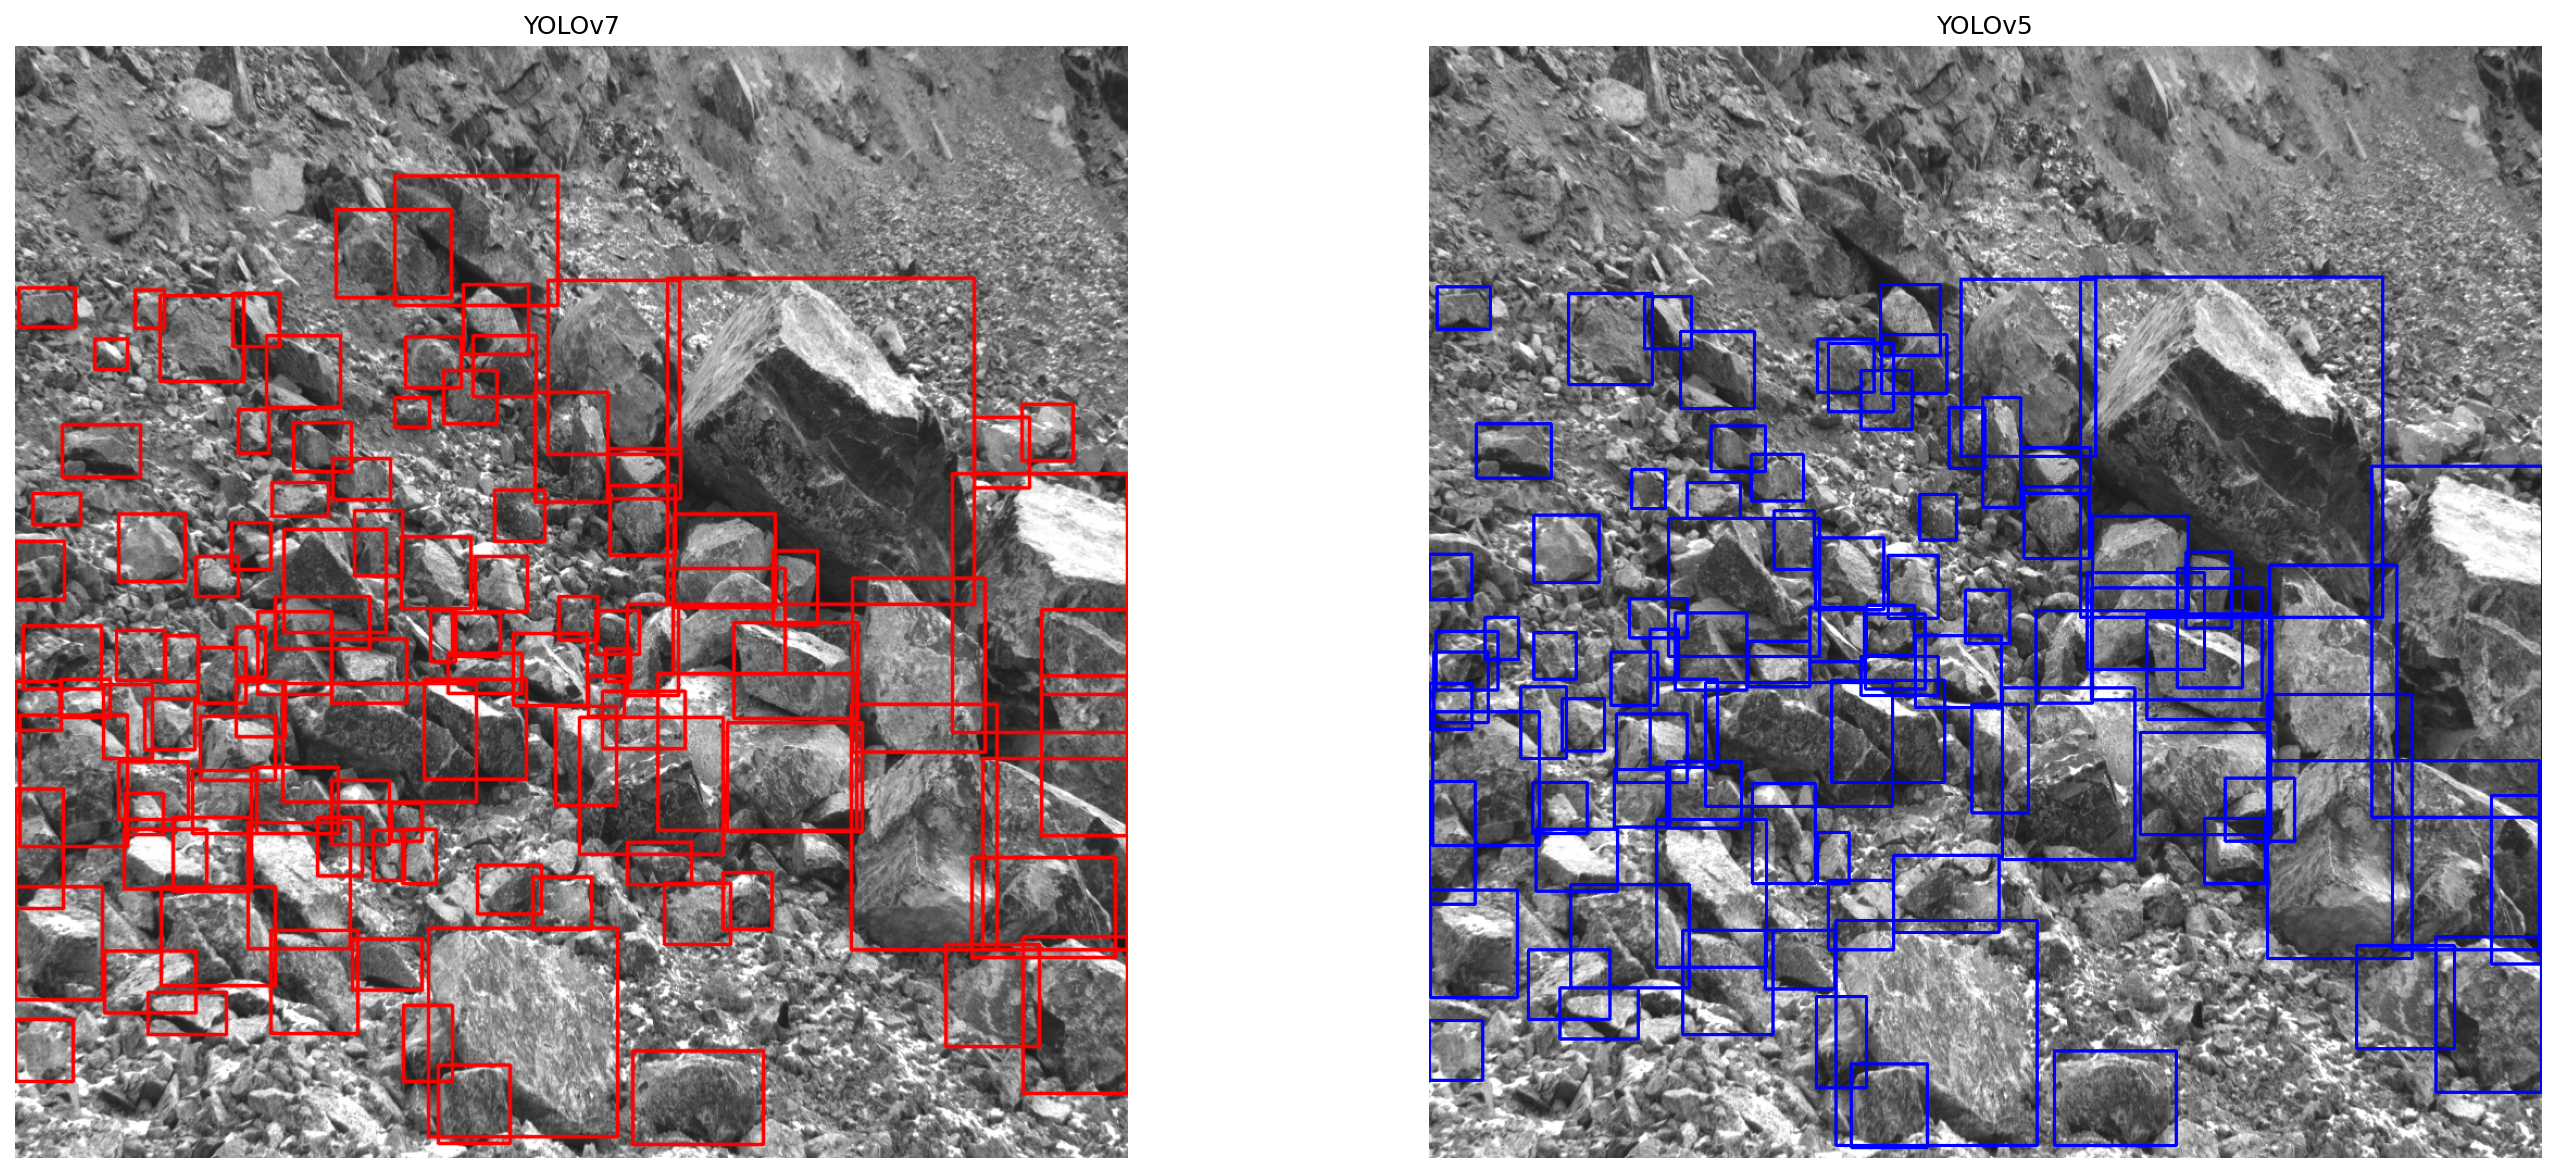

In [153]:
fig,ax = plt.subplots(1,2,dpi = 150, figsize=(19,8))
fig.tight_layout()
ax[0].imshow(img7)
ax[0].axis('off')
ax[0].set_title('YOLOv7')

ax[1].imshow(img5)
ax[1].axis('off')
ax[1].set_title('YOLOv5')
plt.savefig('7_and_5.png', transparent=False)

In [19]:
path_2_label_yolo5 / files[N]

PosixPath('/home/kirilman/Project/asbestos/yolov5/runs/detect/exp/labels/637412037749791299.txt')

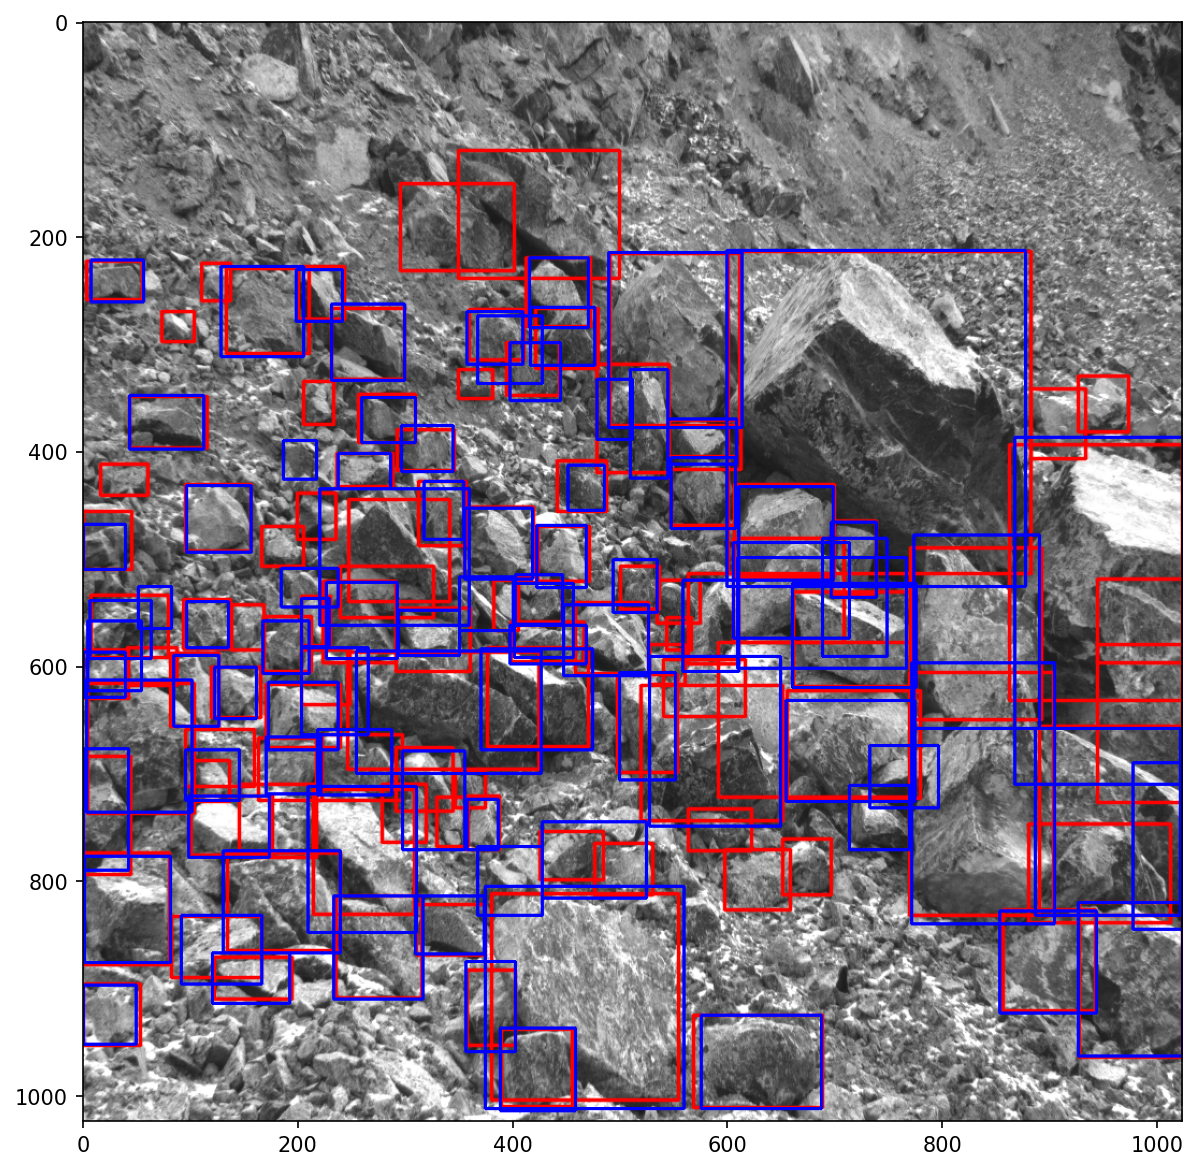

In [8]:
fig = plt.figure(dpi = 150, figsize=(8,8))
img_compare = plot_bboxs(img_source.copy(), xywh2xyxy(labels_one[:,1:],), line_thickness = 2)
img_compare = plot_bboxs(img_compare.copy(), xywh2xyxy(yolo5_labels[:,1:],), color = [0,0, 255],line_thickness = 2, sline=4)
plt.imshow(img_compare)
fig.tight_layout()
plt.savefig('7_and_5.png', transparent=False)

In [9]:
path_2_label / files[N]

PosixPath('/home/kirilman/Project/asbestos/yolov7/runs/detect/exp2/labels/637412037749791299.txt')

FileNotFoundError: [Errno 2] No such file or directory: '7_5/7_and_5_10_11_56_13_16-03-2020_1.txt.jpeg'

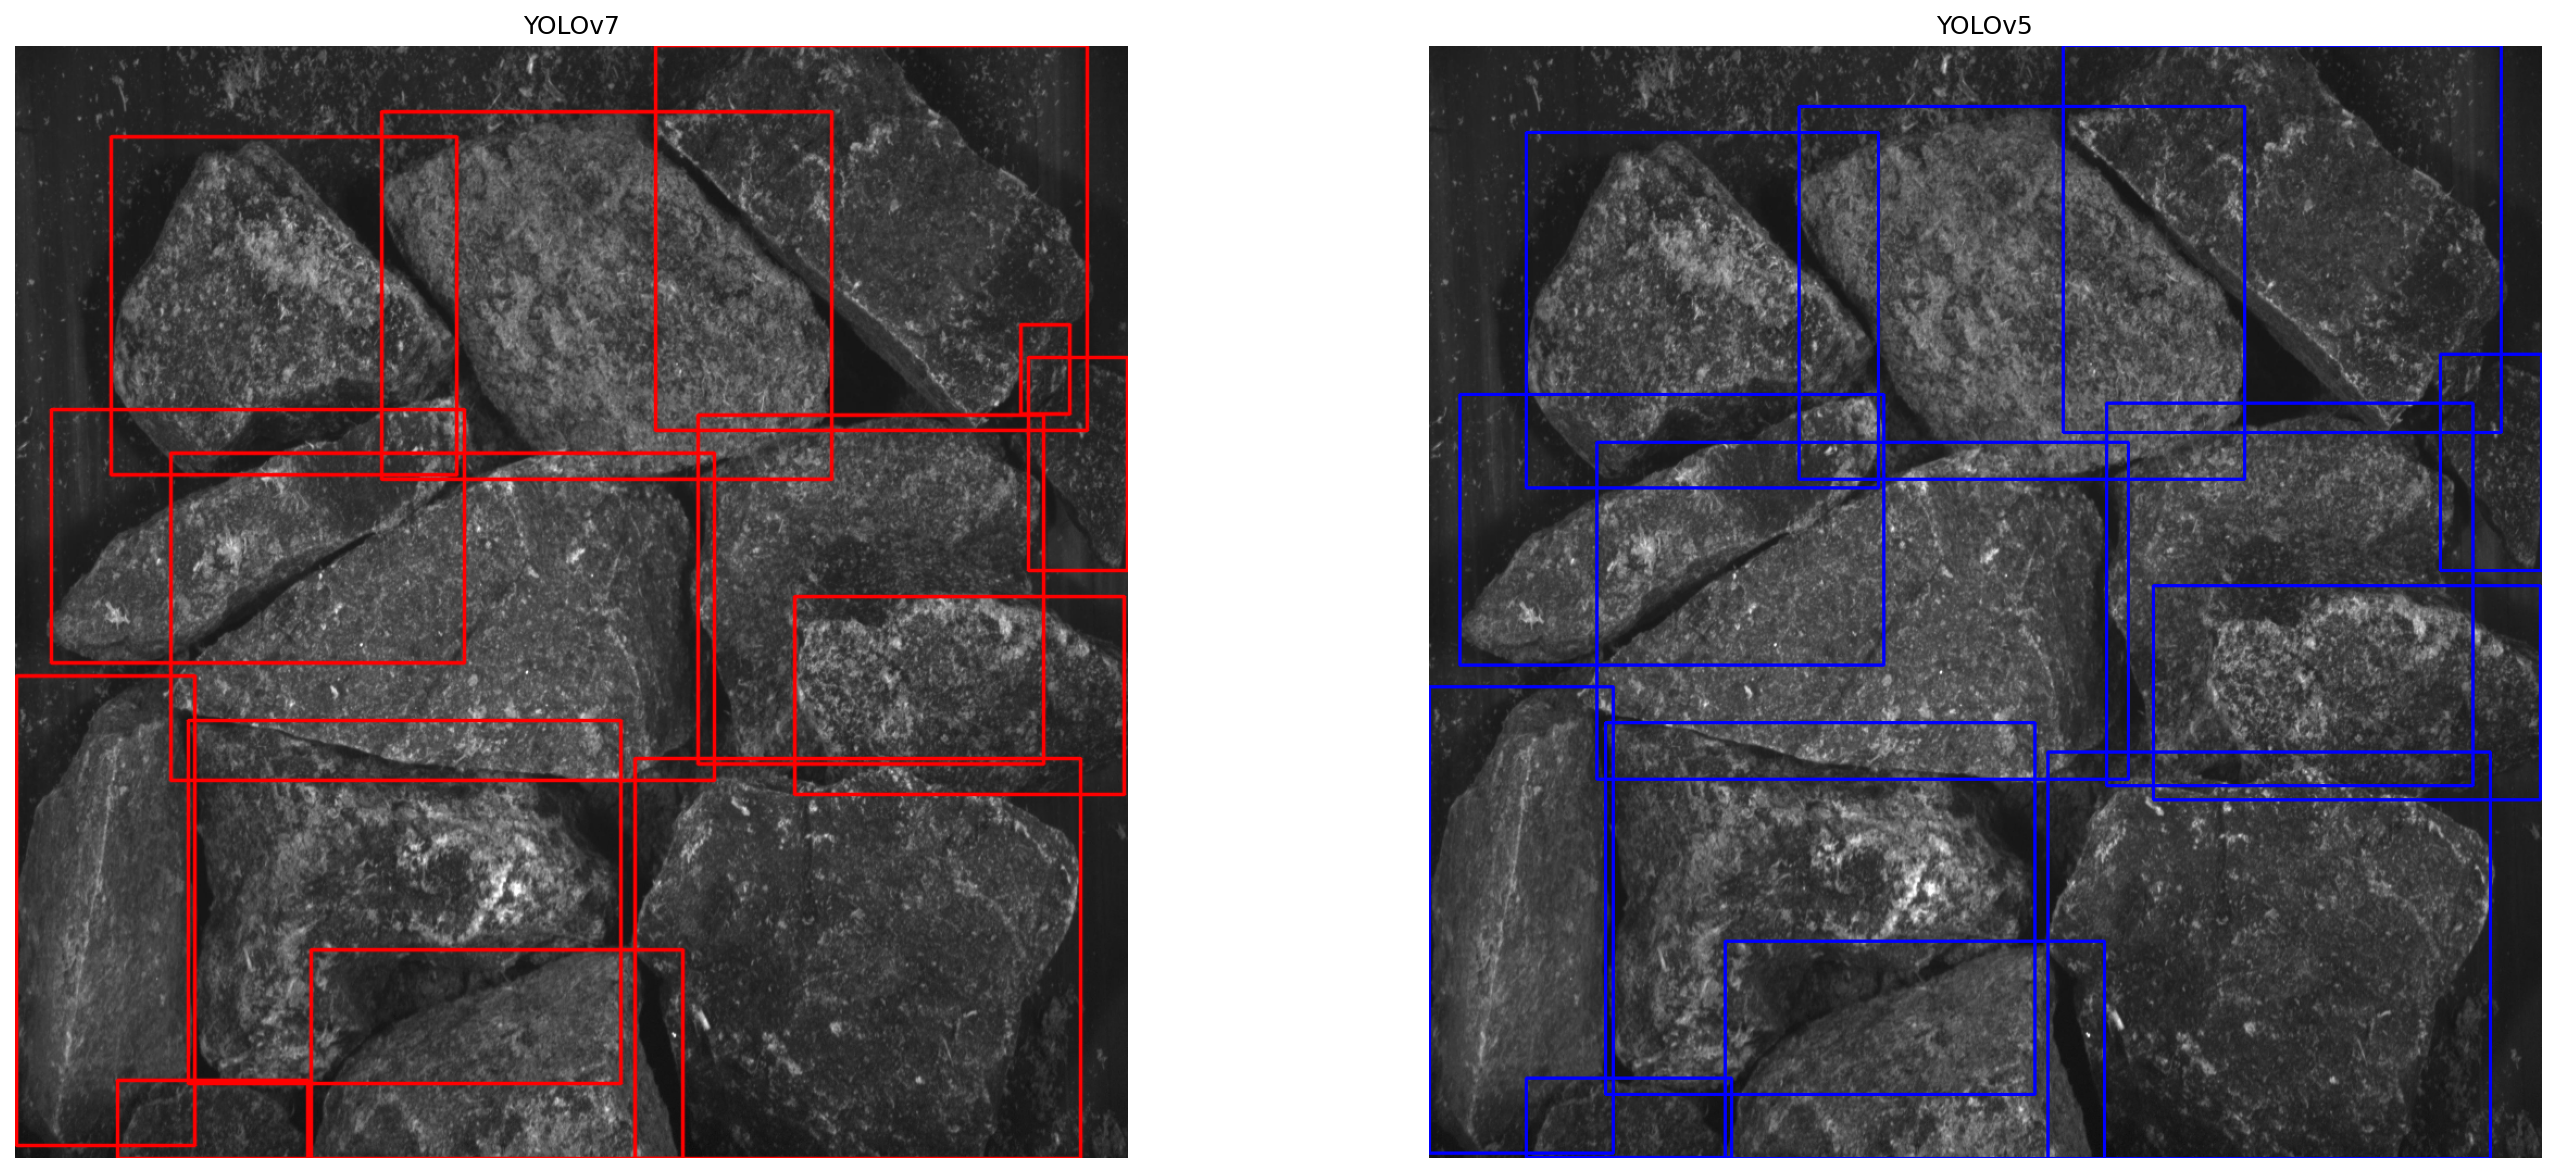

In [10]:
for N in range(len(files)):
    labels_one = np.loadtxt(path_2_label / files[N] )
    if labels_one.shape[0] == 0:
        continue
    yolo5_labels = np.loadtxt(path_2_label_yolo5 / files[N])
    img_source = cv2.imread(str(Path('/home/kirilman/Project/dataset/detection_set2/test/') / image_files[N]))
    img_source = cv2.resize(img_source,(1024,1024))
    img7 = plot_bboxs(img_source.copy(), xywh2xyxy(labels_one[:,1:],), line_thickness = 2)
    img5 = plot_bboxs(img_source.copy(), xywh2xyxy(yolo5_labels[:,1:],), color = [0,0,255],line_thickness = 2, sline=4)

    fig,ax = plt.subplots(1,2,dpi = 150, figsize=(19,8))
    fig.tight_layout()
    ax[0].imshow(img7)
    ax[0].axis('off')
    ax[0].set_title('YOLOv7')

    ax[1].imshow(img5)
    ax[1].axis('off')
    ax[1].set_title('YOLOv5')
    plt.savefig('7_5/7_and_5_{}.jpeg'.format(files[N]), )
    plt.close()

In [11]:
IMG_FORMATS = 'bmp', 'dng', 'jpeg', 'jpg', 'mpo', 'png', 'tif', 'tiff', 'webp' 
from typing import List, Dict, Union
PathLike = Union[Path, str]

def is_image(path:PathLike):
    path = str(path)
    return path.split('.')[-1].lower() in IMG_FORMATS

path_2_label = Path('/home/kirilman/Project/asbestos/yolov7/runs/detect/exp2/labels/')
path_2_label = Path('/home/kirilman/Project/asbestos/YOLOv6/runs/inference/exp/')
labels_files = sorted([x.name for x in list(path_2_label.glob('*.txt'))])
image_files =  sorted([x for x in os.listdir(path_2_label) if is_image(x)])

N = 2
print(len(labels_files), len(image_files))

0 0


In [12]:
labels_files[:3], image_files[:3]

([], [])

In [13]:
txt_file = path_2_label / labels_files[N]
img_file = path_2_label / image_files[N]
print(txt_file, img_file)
yolo5_labels = np.loadtxt(txt_file)
img_source = cv2.imread(img_file)
img_source = cv2.resize(img_source,(1024,1024))
print(labels_files[N], image_files[N])
img7 = plot_bboxs(img_source.copy(), xywh2xyxy(yolo5_labels[:,1:],), line_thickness = 2, color = [255, 255,0])
fig = plt.figure(dpi = 120, figsize=(10,10))
plt.imshow(img7)
del img7

IndexError: list index out of range

In [20]:
def get_diag(coords):
    x1,y1,x2,y2 = coords
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
def get_square(coords):
    x1,y1,x2,y2 = coords
    return (x2-x1)*(y2-y1)

In [21]:
N = 32
path_2_label_yolo5 = Path('/home/kirilman/Project/asbestos/yolov5/runs/detect/exp/labels')
files       = list(path_2_label_yolo5.glob("*"))
image_files = list(path_2_label_yolo5.parent.glob("*.*"))
files.sort(); image_files.sort()

In [54]:
def get_metric_from_dir(p,fun_metric):
    if isinstance(p, str):
        p = Path(p)
    files = list((p.glob("*.txt")))
    diags = []
    for f in files:
        labels = np.loadtxt(f)
        if len(labels.shape) == 1:
            labels = labels.reshape(1,-1)
        if labels.shape[1] == 6:
            labels = labels[:,[1,2,3,4]]
        elif labels.shape[1] == 5:
            labels = labels[:,1:]
        for i,c in enumerate(xywh2xyxy(labels)):
            diags.append(fun_metric(c))
    return diags

In [57]:
diags_yolo5 = np.array(get_metric_from_dir(path_2_label_yolo5,get_diag))
diags_yolo7 = np.array(get_metric_from_dir('../../yolov7/runs/detect/exp2/labels/', get_diag))
diags_yolo3 = np.array(get_metric_from_dir('../../yolov5/runs/detect/yolov3/labels/', get_diag))
diags_train = np.array(get_metric_from_dir('../../../dataset/detection_set2/test/',get_diag))
diags_yolo6 = np.array(get_metric_from_dir('/home/kirilman/Project/asbestos/YOLOv6/runs/inference/exp/test/',get_diag))

In [58]:
diags_yolo6

array([    0.26151,     0.31903,     0.45029, ...,     0.16371,     0.17757,    0.083837])

In [59]:
diags_yolo7

array([    0.44532,     0.29646,     0.39147, ...,     0.19586,     0.15829,     0.14658])

In [60]:
print(diags_train.shape, diags_yolo6.shape)

(1812,) (3288,)


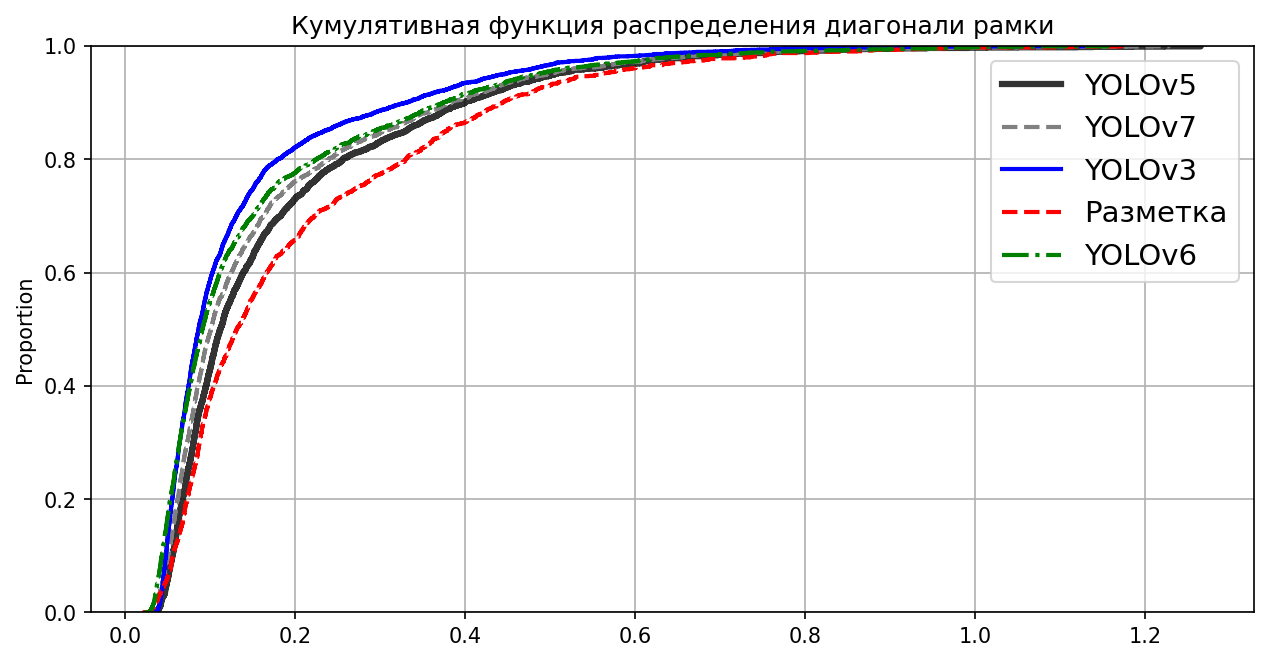

In [86]:
plt.figure(dpi = 150, figsize=(10,5))
seaborn.ecdfplot(diags_yolo5, color='black' ,alpha = 0.8,  label = 'YOLOv5', lw=3  )

ax = seaborn.ecdfplot(diags_yolo7, color='gray', linestyle = '--' , label = 'YOLOv7', lw=2 )
ax = seaborn.ecdfplot(diags_yolo3, color='blue', linestyle = '-' , label = 'YOLOv3', lw=2 )
ax = seaborn.ecdfplot(diags_train, color='red', linestyle = '--' , label = 'Разметка', lw=2 )
ax = seaborn.ecdfplot(diags_yolo6, color='green', linestyle = 'dashdot' , label = 'YOLOv6', lw=2 )

ax.set_title('Кумулятивная функция распределения диагонали рамки')
ax.legend(fontsize=14)
ax.grid()
# plt.show()
plt.savefig('cumsum.jpeg')

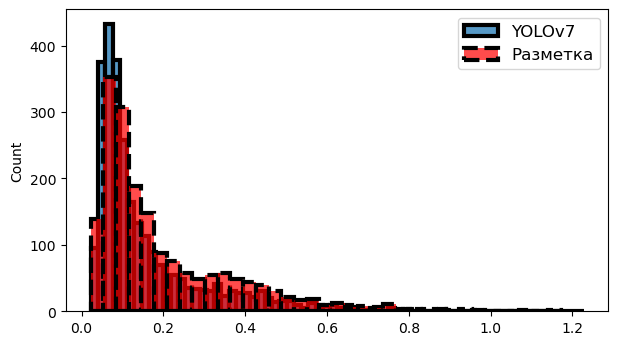

In [183]:
plt.figure(dpi = 100, figsize=(7,4))
# seaborn.histplot(diags_yolo5, color='black' ,alpha = 0.8,  label = 'YOLOv5', lw=3  )
ax = seaborn.histplot(diags_yolo7, label = 'YOLOv7', lw=3 )
ax = seaborn.histplot(diags_train, color='red', linestyle = '--' , label = 'Разметка', lw=3 ,alpha = 0.7)
ax.legend(fontsize=12)
plt.show()

In [184]:
diags_yolo7 = np.array(get_metric_from_dir('../../yolov7/runs/detect/merge4/labels/', get_diag))
diags_train = np.array(get_metric_from_dir('../../../dataset/detection_set2/train/labels/',get_diag))
print(diags_train.shape, diags_yolo5.shape)

(9617,) (2542,)


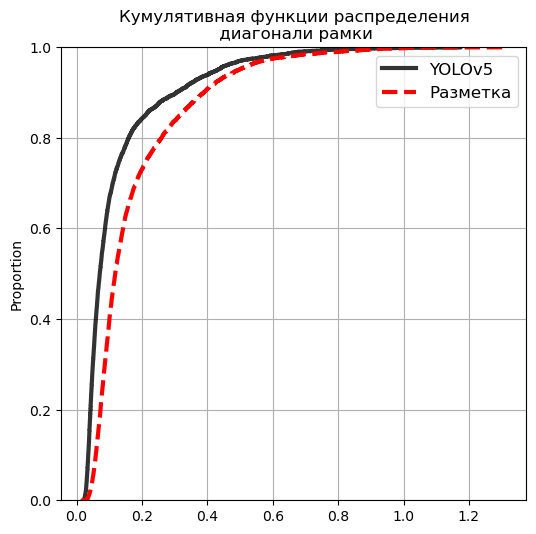

In [187]:
plt.figure(dpi = 100, figsize=(6,6))
seaborn.ecdfplot(diags_yolo7, color='black' ,alpha = 0.8,  label = 'YOLOv5', lw=3  )
ax = seaborn.ecdfplot(diags_train, color='red', linestyle = '--' , label = 'Разметка', lw=3 )
ax.set_title('Кумулятивная функции распределения\n диагонали рамки')
ax.legend(fontsize=12)
ax.grid()
plt.show()

(512, 512, 3)


/home/kirilman/miniconda3/lib/python3.9/site-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


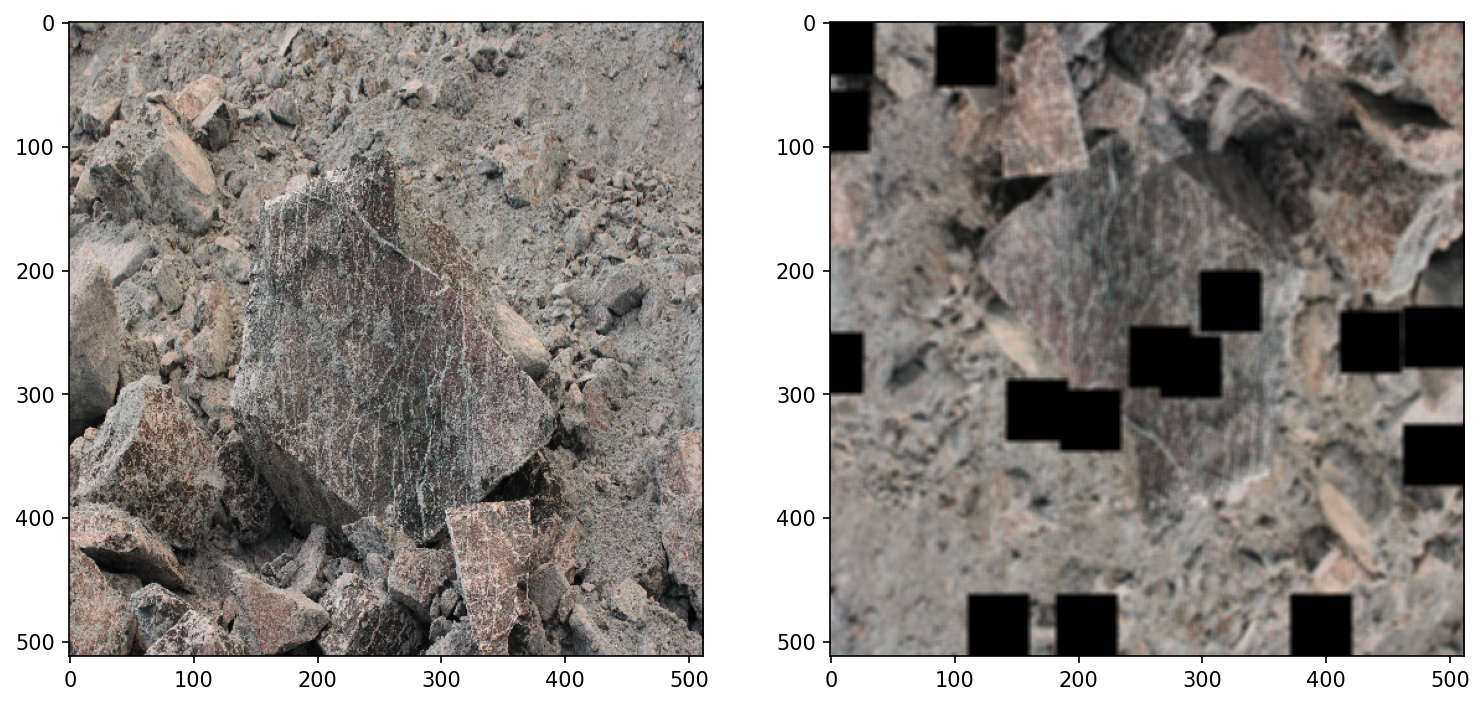

In [188]:
import cv2
from albumentations import RandomBrightnessContrast, Blur, Resize, Cutout, Compose, Flip
from pathlib import Path
import matplotlib.pyplot as plt
p = Path("/home/kirilman/Project/dataset/task_pit_from_phone-2022_04_15_12_27_27/task_pit_from_phone-2022_04_15_12_27_27-cvat for images 1.1/images/IMG_2612.JPG")
img = Resize(512,512).apply(cv2.imread(p.as_posix()))
print(img.shape)
r = int(img.shape[0]*0.02)
size = r+1 if r%2 == 0 else r

list_tr = [Cutout(15, 50, 50, p = 1), Blur(blur_limit=5,p=1), Flip(p=1)]
T = Compose(list_tr)

res = T(image=img)['image']
fig, ax = plt.subplots(1,2, dpi = 150, figsize = (12,7))
ax[0].imshow(img)
ax[1].imshow(res)

In [189]:
### Evaluate

In [36]:
from mean_average_precision.detection_map import DetectionMAP
import os, sys
import torch
sys.path.append('/home/kirilman/Project/asbestos/yolov5/utils/')
from metrics import ConfusionMatrix, box_iou

In [39]:
path_2_label = Path('../../../dataset/detection_set2/test/')
files_label = list(path_2_label.glob('*.txt'))
files_label.sort()

path_2_predict = Path("../../YOLOv6/runs/inference/exp/")
# path_2_predict = Path("../../yolov5/runs/detect/exp9/labels/")
files_predict = list(path_2_predict.glob('*.txt'))
files_predict.sort()

for l,p in zip(files_label, files_predict):
    assert l.name == p.name , 'err'
    labels   = np.loadtxt(l)
    predicts = np.loadtxt(p) 

In [40]:
N = 1
labels_one = np.loadtxt(path_2_label / files_label[N].name )
yolo5_labels = np.loadtxt(path_2_predict / files_label[N].name)

img_source = cv2.imread(str(Path('/home/kirilman/Project/dataset/detection_set2/test/') / image_files[N]))
img_source = cv2.resize(img_source,(1024,1024))
img7 = plot_bboxs(img_source.copy(), xywh2xyxy(labels_one[:,1:],), line_thickness = 2)
img5 = plot_bboxs(img_source.copy(), xywh2xyxy(yolo5_labels[:,1:],), color = [0,0,255],line_thickness = 2, sline=4)
fig = plt.figure(dpi = 150, figsize=(10,10))

# plt.imsave('7.png', img7)
# plt.imsave('5.png', img5)
plt.imsave('7#.png', img7)
fig

FileNotFoundError: ../../YOLOv6/runs/inference/exp/10_11_56_42_16-03-2020_1.txt not found.

In [49]:
import glob
diags_yolo6 = np.array(get_metric_from_dir('/home/kirilman/Project/asbestos/YOLOv6/runs/inference/exp/test/',get_diag))
diags_train = np.array(get_metric_from_dir('/home/kirilman/Project/dataset/detection_set2/for yolov6/labels/test',get_diag))
diags_yolo7 = np.array(get_metric_from_dir('/home/kirilman/Project/asbestos/yolov7/runs/detect/exp2/labels/',get_diag))

print(diags_train.shape, diags_yolo6.shape)

(1812,) (3288,)


<AxesSubplot:ylabel='Count'>

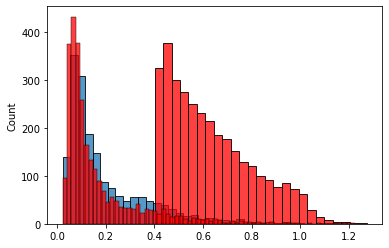

In [50]:
seaborn.histplot(diags_train) 
seaborn.histplot(diags_yolo6,color='red')
seaborn.histplot(diags_yolo7,color='red')

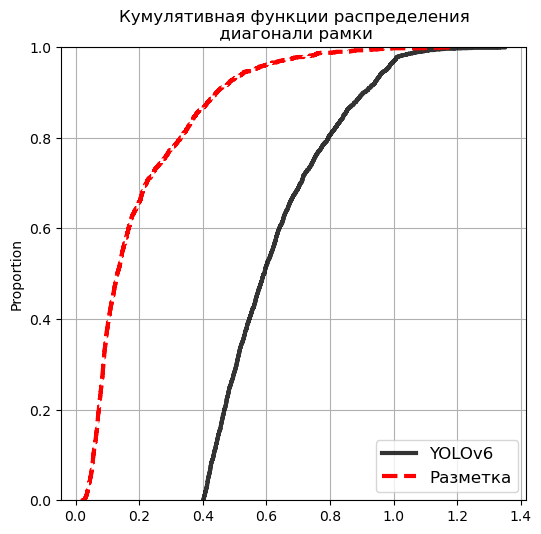

In [194]:
plt.figure(dpi = 100, figsize=(6,6))
seaborn.ecdfplot(diags_yolo6, color='black' ,alpha = 0.8,  label = 'YOLOv6', lw=3  )
ax = seaborn.ecdfplot(diags_train, color='red', linestyle = '--' , label = 'Разметка', lw=3 )
ax.set_title('Кумулятивная функции распределения\n диагонали рамки')
ax.legend(fontsize=12)
ax.grid()
plt.show()

In [200]:
confM = ConfusionMatrix(1)
confM.process_batch(torch.tensor(predicts), torch.tensor(labels))

In [201]:
iou = []
c_tresh = 0.2
for l,p in zip(files_label, files_predict):
    assert l.name == p.name , 'err'
    labels   = np.loadtxt(l)
    predicts = np.loadtxt(p) 
    indx = np.where(predicts[:,1] > c_tresh)[0]
    
    a = torch.tensor(predicts[indx,2:])
    b = torch.tensor(labels[:,1:])
    if a.shape[0]:
        ciou = box_iou(a,b).sum().numpy()
        iou.append(ciou)
        # print(ciou)
iou = np.array(iou).mean()
iou

0.08230336661276677

In [60]:
from tqdm import tqdm 

In [59]:
from dataset import get_paths
img_files = get_paths('../../yolov5/runs/detect/exp9/')
train_labels = get_paths('../../../dataset/detection_set2/labels/')
label_files  = {Path(f).name.split('.')[0]: f for f in train_labels}
for f_img in tqdm(img_files):
    name = Path(f_img).name.split('.')[0]
    labels = np.loadtxt(label_files[name])
    img_source = cv2.imread(f_img)
    if len(labels.shape) == 1:
        labels.reshape(1, -1)
    try:    
        img_source = plot_bboxs(img_source.copy(), xywh2xyxy(labels[:,1:],), line_thickness = 3, color = [0, 255,0])
    except:
        pass
    Image.fromarray(img_source).save('results/' + name + '.jpg')
fig = plt.figure( dpi = 120)
plt.imshow(img_source)

 50%|████████████████████▌                    | 394/788 [00:52<00:52,  7.52it/s]


AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [101]:
def load_labels(path):
    labels = np.loadtxt(path)
    img_source = cv2.imread(f_img)
    if len(labels.shape) == 1:
        labels.reshape(1, -1)
    return labels[:,1:]

In [78]:
def get_names_from_coco(segment_file):
    coco = COCO(segment_file)
    frame = pd.DataFrame(coco.anns).T
    df_image = pd.DataFrame(coco.imgs).T
    image_names = [p.split('/')[-1].split('.')[0] for p in list(df_image.file_name)]
    IMAGE_W = df_image.iloc[0]['width']
    IMAGE_H = df_image.iloc[0]['height']
    return image_names, IMAGE_W, IMAGE_H

In [174]:
train_labels = get_paths('../../../dataset/detection_set2/labels/')
label_files  = {Path(f).name.split('.')[0]: f for f in train_labels}
img_files    = {Path(f).name.split('.')[0]: f for f in get_paths('../../../dataset/detection_set2/images/')}
predict_files= {Path(f).name.split('.')[0]: f for f in get_paths('/home/kirilman/Project/asbestos/yolov5/runs/detect/exp9/labels/')}
predict_files= {Path(f).name.split('.')[0]: f for f in get_paths('/home/kirilman/Project/asbestos/yolov7/runs/detect/exp6/labels/')}

for segment_file in get_paths_from_dirs(['../../../dataset/annotation/'],['json']):
    image_names,h,w = get_names_from_coco(segment_file)
    for name in image_names[:3]:
        image = cv2.imread(img_files[name])
        labels = load_labels(label_files[name])
        image = plot_bboxs(image, xywh2xyxy(labels), color=[0,0,255])
        pred_labels = load_labels(predict_files[name])    
        image = plot_bboxs(image, xywh2xyxy(pred_labels), color=[255,70, 0])
        dataset_name = str(segment_file.parent).split('/')[-1]
        image = cv2.putText(image, dataset_name , (int(w/2),100), 4, 2, [0,128,0], 3, cv2.LINE_AA, False)
        fig = plt.figure(dpi = 150, figsize=(12,12))
        Image.fromarray(image).save('figures/' + dataset_name + name + '.jpg')
    plt.close('all')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [155]:
str(segment_file.parent).split('/')[-1]

'pits_stones_detections_111121'